/home/artyom/VUZ_Learning/MMO/venv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


Выбранные признаки: Index(['Product_15-ay047nv (i3-6006U/6GB/1TB/Radeon',
       'Product_K146 (N3350/4GB/32GB/W10)', 'ScreenResolution_1920x1080',
       'Cpu_Intel Pentium Dual Core N4200 1.1GHz', 'Weight_4.7kg'],
      dtype='object')


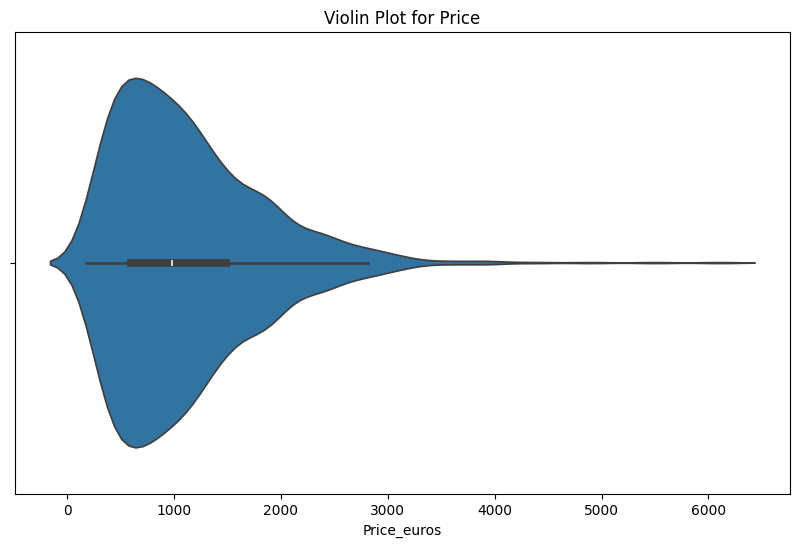

In [5]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Загрузка набора данных
df = pd.read_csv('laptop_price.csv', encoding='latin-1')

# Нормализация одного числового признака с использованием функции "обратная зависимость - 1 / X"
# Выберем произвольный числовой признак, например, 'Price_euros'
transformer = FunctionTransformer(func=lambda x: 1 / x, validate=True)
df['Price_transformed'] = transformer.transform(df[['Price_euros']])

# Преобразование категориальных признаков в числовые
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Процедура отбора признаков методом обертывания (wrapper method) с использованием алгоритма полного перебора (exhaustive feature selection)
X = df_encoded.drop(columns=['Price_euros'])
y = df_encoded['Price_euros']

# Используем Recursive Feature Elimination (RFE) с линейной регрессией
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Предположим, что нам нужно выбрать 5 признаков
X_rfe = rfe.fit_transform(X, y)

# Проверка выбранных признаков
selected_features = X.columns[rfe.support_]

# Выводим выбранные признаки
print("Выбранные признаки:", selected_features)

# Построение скрипичной диаграммы для произвольной колонки данных
# Выберем произвольную колонку, например, 'Price_euros'
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Price_euros'])
plt.title('Violin Plot for Price')
plt.show()